Import Relevant Data to Look into
http://insideairbnb.com/get-the-data

# Contents
<l></l>

<span style="font-size:1.2em;">

- <a href="#Overview">Overview</a>

- <a href="#Introduction and Business Case">Introduction and Business Case</a>  

- <a href="#Business Understandings">Business Understandings</a>      

- <a href="#Collaborative Filtering">Collaborative Filtering</a>
    
    - <a href="#Imports">Imports</a>
    
    - <a href="#Surprise Data & Split">Surprise Data & Split</a>
    
    - <a href="#Baselines">Baselines</a>
    
    - <a href="#SVD & Grid Searches">SVD & Grid Searches</a>
    
    - <a href="#NMF & Grid Searches">NMF & Grid Searches</a>
    
    - <a href="#SVD++ & Grid Searches">SVD++ & Grid Searches</a>
    
    - <a href="#Model Evaluation">Model Evaluation</a>
    
- <a href="#Recommendation Function">Recommendation Function</a>
    
    - <a href="#Building">Building</a>
    
    - <a href="#Function">Function</a>
    
    - <a href="#Evaulation">Evaulation</a>
       
- <a href="#Conclusion">Conclusion</a>

Referencing a lot of work done by: Alex Gastone

- https://github.com/alexgastone/AirbnbRecommend/blob/master/Airbnb_CollabFiltering.ipynb. (Will be changing code more as continuing to iterate)
- https://medium.com/@alexandra.gg150/how-to-build-a-recommender-system-for-airbnb-in-python-3a92ad500fa5

Pkg info and other resources looking into: 
- https://towardsdatascience.com/4-python-libraries-to-detect-english-and-non-english-language-c82ad3efd430
- https://pypi.org/project/langdetect/
- https://pypi.org/project/google-trans-new/
- https://stackoverflow.com/questions/43146528/how-to-extract-all-the-emojis-from-text
- https://pypi.org/project/emoji/
- https://www.pauldesalvo.com/extract-emojis-from-python-strings-and-chart-frequency-using-spacy-pandas-and-plotly/
- https://wellsr.com/python/convert-text-to-emojis-and-vice-versa-in-python/#:~:text=To%20convert%20emojis%20in%20the,token%20with%20the%20corresponding%20text.
- https://stackoverflow.com/questions/73108683/getting-error-cannot-import-name-unicode-emoji-from-emoji-unicode-codes
- https://wellsr.com/python/convert-text-to-emojis-and-vice-versa-in-python/#:~:text=To%20convert%20emojis%20in%20the,token%20with%20the%20corresponding%20text.

# Milan Airbnb Recommender
Creating a recommendation system for individuals who have stayed previously at Milan Airbnb and are wishing to at a new one. 

By: Anat Jacobson 

--- 

### Overview 

This project is based on data from previous visitors and reviewers of Milan's airbnb. The data has been used to create a various recommadation models and provide valuable insight into whether an airbnb would be liked or recommended by an individual or not. This can aid individ  This be extremely helpful for both guests and hosts when looking into where to stay next so that they could have a personalized experience that they could enjoy based on past experiences. 


### Introduction and Business Case

There are thousands of Airbnb options within Milan but each one comes with different perks and ammenities. With so many listings available on the airbnb platform, it can be overwhelming for guests to find the perfect accommodation for their needs. A recommendation system could analyze a user's previous bookings, preferences, and behaviors to suggest listings that are likely to meet their needs and exceed their expectations. By providing personalized recommendations, a recommendation system could enhance the user experience on Airbnb and increase customer satisfaction, ultimately leading to higher retention rates and revenue for the platform.

The data for this notebook has been provided by Inside Airbnb:  Airbnb through <a href="http://insideairbnb.com/milan" >Milans data</a>.

### Business Understandings

#### Applications
- Airbnb users can make informed decisions when deciding which airbnb to rent next and have a great experience
- Airbnb itself will also benefit from users having more personalized expereience they would likely have higher retention and revenue rates when more customers are enjoying each airbnb stay. 

#### Data 
AJ EDIT THIS 
The dataset that was worked with after cleaning had over 53K wells in it with data that focused on the geographical information of the well as well as information of water source, payments, quality of water and other important features. 

The predictive measure in this set was whether the well is functional or not, positive being functional. The measure was initially in a seperate dataframe but was merged with the rest of the data to be able to accurately create a model. This cleaning and merging process is explained below. 

A few key metrics taken into account from this dataset were: 

- 5 Different quality groups of water
- 26 regions
- 1.8K funders
- 7 Source types

Additionally, the predictive measure was initailly a tirtiary measure and I changed it to binary that will be explained below as well. 

### Methodology
Because of the many categorical features that can influence well functionality pricing, this project investigates features and their effects through various types of models in an attempt to best predict the well condition. This is done through the use of logistic regression, decision trees and random forest. Our predictor for this model is whether the well is functioning or not, positive class being functional. Our measure for this project will be based on the highest f1 score since for the purposes of this project, we not only care whether the prediction is positive cases but also whether they are accurately positive and whether negative results are accurately negative. 

---

## Data Exploration and Analysis
Importing all packages needed and creating function for opening zip file. 

In [2]:
#imports necessary downloads

import pandas as pd
import numpy as np
import zipfile

import matplotlib.pyplot as plt

!pip install langdetect
from langdetect import detect


import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

from sklearn.feature_extraction.text import TfidfVectorizer

import re


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/anatjacobson/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

## Import CSVs and Clean all Data Needed
2 Datasets imported: 
- reviews: contains all the reviews of the dataset, reviewer ID's, and listing IDs
- listings: contains all the features of the listings and the listing IDs.
    - For the purposes of this project, the listings data will only be used for comparisson purposes when looking at how features of recommended airbnbs for users compare to actual airbnbs a user has reviewed. For this reason, we will not be doing much cleaning on this dataset. 

Will be working with both of these dataframes to recommend the best user airbnbs! 

In [13]:
#opening and saving zip file for reviews
with zipfile.ZipFile("Data/reviews.csv.zip") as z:
   with z.open("Data/reviews.csv") as f:              
      reviews = pd.read_csv(f)
      reviews.head()

KeyError: "There is no item named 'Data/reviews.csv' in the archive"

In [9]:
with zipfile.ZipFile('Data/reviews.csv.zip') as myzip:

 with myzip.open("Data/reviews.csv") as myfile:

      print(myfile.readline())

KeyError: "There is no item named 'Data/reviews.csv' in the archive"

In [12]:
reviews = pd.read_csv('Data/reviews.csv')

In [11]:
#importing and saving listings file
listings = pd.read_csv('Data/listings.csv')

In [14]:
#dropping all columns that will not be relevant for the purposes of this project
listings.drop(columns = ['listing_url', 'scrape_id', 'last_scraped', 'source', 'picture_url',
                        'host_id',  'license', 'calculated_host_listings_count_shared_rooms',
                        'calculated_host_listings_count_entire_homes', 'reviews_per_month',
                        'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count',
                        'first_review', 'last_review', 'host_since', 'host_url', 'minimum_nights',
                        'minimum_minimum_nights', 'maximum_maximum_nights', 'minimum_maximum_nights',
                         'maximum_nights_avg_ntm', 'minimum_nights_avg_ntm', 'longitude', 'latitude',
                        'bathrooms', 'calendar_updated', 'availability_30', 'availability_60',
                        'availability_90', 'availability_365', 'neighbourhood_group_cleansed',
                        'neighbourhood', 'has_availability', 'bathrooms_text', 'host_about',
                        'host_thumbnail_url', 'host_picture_url', 'maximum_minimum_nights',
                        'maximum_nights', 'price', 'host_has_profile_pic', 'host_listings_count',
                        'host_neighbourhood', 'host_verifications', 'host_total_listings_count',
                        'number_of_reviews_l30d', 'number_of_reviews_ltm', 'calendar_last_scraped',
                        'number_of_reviews'], 
              
              
              inplace = True)

In [15]:
#checking the shape of the dataframe
print('reviews shape: ', reviews.shape)

#looking at the first 5 rows of the dataframe 
display(reviews.head())


reviews shape:  (611804, 6)


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,6400,36772,2010-04-19,94463,Hyun,I had such a great stay at 'the studio.' Fran...
1,6400,227727,2011-04-16,415910,Tej,Staying at Francesca's and Alberto's place was...
2,6400,1162608,2012-04-22,415910,Tej,This is my second time staying with Francesca ...
3,6400,11670681,2014-04-11,8464658,Isabelle,"Ein wunderbares Zimmer mit privatem Bad/ WC, a..."
4,6400,11780336,2014-04-14,5427294,Hatice,"I was lucky so I have stayed with Francesca, A..."


In [16]:
#Running a count on the number of reviews
reviews['reviewer_id'].count()

611804

In [17]:
#showing a count of the number of unique reviewers
reviews['reviewer_id'].nunique()

547728

Checking out how many nulls we have. We mostly care about null comments since we will need to remove those. 

In [18]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611804 entries, 0 to 611803
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     611804 non-null  int64 
 1   id             611804 non-null  int64 
 2   date           611804 non-null  object
 3   reviewer_id    611804 non-null  int64 
 4   reviewer_name  611804 non-null  object
 5   comments       611777 non-null  object
dtypes: int64(3), object(3)
memory usage: 28.0+ MB


Not bad! We are going to drop rows with null comments now since a null comment is useless for our recommendation system. 

In [19]:
reviews = reviews.dropna()

#### Identifying our sample dataset
Below, will be doing  a groupby below to check how many reviews a given reviewer gives. Will then be checking top 50 sorting from greatest to least. 
- The reasoning behind this preliminary analysis is to see if there is enough data to run this recommendation system on for it to be statistically significant. If for example there were only 10 people who gave more than 1 review, this would be too small of a dataset to work with. 

In [21]:
#running the groupby
reviews.groupby('reviewer_id').count().sort_values('reviewer_name', ascending = False).head(50)

,listing_id,id,date,reviewer_name,comments
reviewer_id,,,,,
21546831,55,55,55,55,55
4458363,54,54,54,54,54
41371840,44,44,44,44,44
31058107,42,42,42,42,42
26149575,38,38,38,38,38
65479491,37,37,37,37,37
432993993,36,36,36,36,36
90675773,34,34,34,34,34
257621892,32,32,32,32,32


In [22]:
#saving this as its own df to continue analysis
group_df = reviews.groupby('reviewer_id').count()

In [23]:
#checking for all individuals that have more than 4 reviews. The more users the better!
group_df.loc[group_df['reviewer_name'] > 4] 

,listing_id,id,date,reviewer_name,comments
reviewer_id,,,,,
30054,6,6,6,6,6
31333,5,5,5,5,5
51871,7,7,7,7,7
153875,8,8,8,8,8
177094,5,5,5,5,5
...,...,...,...,...,...
487561278,6,6,6,6,6
488007125,5,5,5,5,5
489595940,7,7,7,7,7


This is a good amount of users! Lets see how many idividuals gave more than 1 review. 

In [24]:
#checking for more than 1 review
group_df.loc[group_df['reviewer_name'] > 1]

,listing_id,id,date,reviewer_name,comments
reviewer_id,,,,,
4891,2,2,2,2,2
5102,2,2,2,2,2
10918,2,2,2,2,2
15019,2,2,2,2,2
17637,2,2,2,2,2
...,...,...,...,...,...
502149046,2,2,2,2,2
502289079,2,2,2,2,2
502622705,2,2,2,2,2


This is a lot! We are going to try subsetting by reviews greater than 1 since we will still need to filter out non english reviews. The reason we need to look at reviewers with more than one review is for the system to recognize a pattern within these reviewers.

In [25]:
reviews.head(5)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,6400,36772,2010-04-19,94463,Hyun,I had such a great stay at 'the studio.' Fran...
1,6400,227727,2011-04-16,415910,Tej,Staying at Francesca's and Alberto's place was...
2,6400,1162608,2012-04-22,415910,Tej,This is my second time staying with Francesca ...
3,6400,11670681,2014-04-11,8464658,Isabelle,"Ein wunderbares Zimmer mit privatem Bad/ WC, a..."
4,6400,11780336,2014-04-14,5427294,Hatice,"I was lucky so I have stayed with Francesca, A..."


Grouping by reviewer_id shows up more than one time to work on the right dataframe for a rec system

In [26]:
#showing the reviewers and comments with those more than 1
reviews.groupby('reviewer_id').filter(lambda x : x['reviewer_id'].shape[0] > 1)

,listing_id,id,date,reviewer_id,reviewer_name,comments
1,6400,227727,2011-04-16,415910,Tej,Staying at Francesca's and Alberto's place was...
2,6400,1162608,2012-04-22,415910,Tej,This is my second time staying with Francesca ...
3,6400,11670681,2014-04-11,8464658,Isabelle,"Ein wunderbares Zimmer mit privatem Bad/ WC, a..."
5,6400,30074708,2015-04-17,415910,Tej,Always a pleasure staying with Francesca and f...
6,6400,47340535,2015-09-18,5023643,Glynn,The host canceled this reservation the day bef...
...,...,...,...,...,...,...
611776,841733870641961371,846910401901382122,2023-03-14,88108605,Diego,en general el departamento está bien. pusieron...
611782,843618815888733815,846290934716632307,2023-03-13,223990220,Tare,Great place.<br/>Host was really helpful.<br/>...
611785,846130517363365733,849082404435780093,2023-03-17,35287167,Greta,"The apartment is in a very good location, just..."
611789,845609167593520388,849860891804052515,2023-03-18,144769793,Gina,Casa pulita e in ordine come da descrizione. S...


Below checking that this group by is working the way that it should.

In [27]:
reviews.groupby('reviewer_id').filter(lambda x : x['reviewer_id'].shape[0]== 1)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,6400,36772,2010-04-19,94463,Hyun,I had such a great stay at 'the studio.' Fran...
4,6400,11780336,2014-04-14,5427294,Hatice,"I was lucky so I have stayed with Francesca, A..."
12,23986,1175194,2012-04-24,1695229,Leah,We came to Milan for the Salone and had a fant...
13,23986,47872586,2015-09-21,17316381,Paolo,La zona è molto comoda e la via è tranquilla. ...
14,23986,70176179,2016-04-16,41686521,Naama,"Great apartment, clean and well equipped, grea..."
...,...,...,...,...,...,...
611798,837619455066975304,848390146274753958,2023-03-16,416263051,Catalin,It was very good
611799,838184897759433339,847722747234842814,2023-03-15,46351960,Irina,Nice and quiet area not far from the metro and...
611801,838266422550245358,840401357243960792,2023-03-05,424155005,Riccardo,Ottimo
611802,838266422550245358,843313780914723751,2023-03-09,388259970,Mariana,It was really nice!


In [28]:
reviews.shape[0] - reviews['reviewer_id'].value_counts().shape[0]

64071

These 2 shapes add up to our number of rows in the full dataset so it looks like this worked! Below saving off a new dataframe with the values of individuals with more than 1 review since these are the users we will be creating the recommendation system off of.

In [29]:
multi_review_df = reviews.groupby('reviewer_id').filter(lambda x : x['reviewer_id'].shape[0]>=2)

In [30]:
multi_review_df.shape

(104478, 6)

In [35]:
multi_review_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104478 entries, 1 to 611800
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     104478 non-null  int64 
 1   id             104478 non-null  int64 
 2   date           104478 non-null  object
 3   reviewer_id    104478 non-null  int64 
 4   reviewer_name  104478 non-null  object
 5   comments       104478 non-null  object
dtypes: int64(3), object(3)
memory usage: 5.6+ MB


#### Cleaning Dataset for useful comments
- Removing all "unhelpful comments" meaning those with just a "." or blank. 
- Removing all comments that are emojis
- Creating a new column for language and dropping non-english reviews.

Below dropping unhelpful comments such ones that just have a "."  or other errors. 

In [31]:
index_dash = multi_review_df[ multi_review_df['comments'].str.match('-')].index
multi_review_df.drop(index_dash, inplace=True)

alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)
multi_review_df['comments'] = multi_review_df['comments'].map(alphanumeric)

In [32]:
#checking new shape
multi_review_df.shape

(104446, 6)

Below creating a list for all errors in the comments so that they can be removed before doing a sentiment analysis on this. This referencing work from Alex Gastone https://github.com/alexgastone/AirbnbRecommend/tree/master. 

In [33]:
num_errors = 0
err = []

for index, row in multi_review_df.iterrows():
    try:
        language = detect(row['comments']) 
    except:
        num_errors += 1
        err.append(index)
        print("This row throws an error:", row['comments'], row['reviewer_id'])

This row throws an error: . 411328576
This row throws an error: . 150986893
This row throws an error: . 177834202
This row throws an error: . 108801133
This row throws an error: 👌🏼 365065866
This row throws an error: . 138992230
This row throws an error: . 387506618
This row throws an error: 👍 414052082
This row throws an error: 👌🏽👌🏽👌🏽 180910287
This row throws an error: . 252823048
This row throws an error: 👏🏻🖤 107217428
This row throws an error: . 77570749
This row throws an error: . 45430085
This row throws an error: . 364141470
This row throws an error: 👍 444913428
This row throws an error: . 271759168
This row throws an error: . 21116219
This row throws an error: ! 127554328
This row throws an error: . 144289574
This row throws an error: .......... 310193172
This row throws an error: Per partecipare alla Milano Marathon   ho scelto di soggiornare nell'alloggio di Marco. Il suo appartamento si trovava a meno di   minuti a piedi dalla Stazione Centrale (direzione centro storico) e a

This row throws an error: . 46684961
This row throws an error: . 276895410
This row throws an error: ... 422019839
This row throws an error: ! 450788903
This row throws an error: . 93702446
This row throws an error: . 409927389
This row throws an error: . 122799548
This row throws an error: . 57733125
This row throws an error: 👏🏼 364344446
This row throws an error: !!!! 148707174
This row throws an error: 🌟🌟🌟🌟🌟 293096723
This row throws an error: . 456870979
This row throws an error: . 77570749
This row throws an error: ⭐️⭐️⭐️⭐️⭐️ 253481012
This row throws an error: ⭐️⭐️⭐️⭐️⭐️ 253481012
This row throws an error: 👌 77570749
This row throws an error: . 486990617
This row throws an error: . 9226667
This row throws an error: . 69071871
This row throws an error: 👌🏻 235649252
This row throws an error: . 51924171
This row throws an error: . 86967866
This row throws an error: 👌 414052082
This row throws an error: . 187736689
This row throws an error: . 410253984
This row throws an error: ´ 308

Can see above a lot of commented rows are emojis! Will atempt to convert these emojis at a later stage, for now dropping all these rows. Can try to convert emojis to text but others going to remove. 

In [34]:
#Removing all non identifiable comments (the ones we got from code)
multi_review_df.drop(err, axis=0, inplace=True)

In [37]:
#checking new dataframe shape and head
print(multi_review_df.shape)
display(multi_review_df.head())

(104120, 6)


,listing_id,id,date,reviewer_id,reviewer_name,comments
1,6400,227727,2011-04-16,415910,Tej,Staying at Francesca's and Alberto's place was...
2,6400,1162608,2012-04-22,415910,Tej,This is my second time staying with Francesca ...
3,6400,11670681,2014-04-11,8464658,Isabelle,"Ein wunderbares Zimmer mit privatem Bad/ WC, a..."
5,6400,30074708,2015-04-17,415910,Tej,Always a pleasure staying with Francesca and f...
6,6400,47340535,2015-09-18,5023643,Glynn,The host canceled this reservation the day bef...


In [39]:
len(err) #dropped 326 rows 

326

Checking individuals still have at least 2 reviews, if not will drop them.

In [40]:
multi_review_df.groupby('reviewer_id').filter(lambda x : x['reviewer_id'].shape[0] == 1)



,listing_id,id,date,reviewer_id,reviewer_name,comments
11691,715392,711240566,2020-11-25,13753326,Massimo,"Appartamento confortevole e accogliente, con l..."
16955,786441,420088240427054321,2021-08-02,78145059,Nicola,Loft splendido in posizione strategica. Michel...
26350,1048855,102234877,2016-09-17,93702446,Ermes Fabrizio,"Ottima, buon quartiere"
40048,2035151,227540479,2018-01-15,89529924,Hagai,Great place and great value
46884,2221901,565327219,2019-11-17,275007113,光一郎,。
...,...,...,...,...,...,...
605090,746094666730299679,796931867297678583,2023-01-04,389897131,Marco,Appartamento carino e posizionato bene nel cen...
607910,766546991000790161,807828312427541088,2023-01-19,429915232,Maayan,It was amazing very comfortable very homey
608274,768842452874908603,788939567614809708,2022-12-24,364141470,Andrea,Bellissimo appartamento con la chicca del terr...
609446,786946845539327541,789667575573240907,2022-12-25,456622738,Aly,e una cosa bellissimo bello pulito c'è tutto n...


Will likely be dropping these in the following steps because they are not in english so will leave for now to save code. Below we are adding a column for what language the reviews are in and then dropping all non english reviews.

In [41]:
multi_review_df['language'] = multi_review_df['comments'].apply(detect)

In [42]:
#creating data frame with only english reviews
english_reviews = multi_review_df.loc[multi_review_df['language'] == 'en']

In [44]:
print(english_reviews.shape)
display(english_reviews.head())

(48724, 7)


,listing_id,id,date,reviewer_id,reviewer_name,comments,language
1,6400,227727,2011-04-16,415910,Tej,Staying at Francesca's and Alberto's place was...,en
2,6400,1162608,2012-04-22,415910,Tej,This is my second time staying with Francesca ...,en
5,6400,30074708,2015-04-17,415910,Tej,Always a pleasure staying with Francesca and f...,en
6,6400,47340535,2015-09-18,5023643,Glynn,The host canceled this reservation the day bef...,en
7,6400,70088360,2016-04-16,415910,Tej,Another nice stay at Francesca's place.. I fee...,en


In [45]:
#checking there is more than one review for each person
english_reviews.groupby('reviewer_id').filter(lambda x : x['reviewer_id'].shape[0] == 1)


,listing_id,id,date,reviewer_id,reviewer_name,comments,language
23,23986,161250881,2017-06-17,134230425,Daniel,Jeremy was very communicative and has a great ...,en
333,304050,4134957,2013-04-13,2301725,Elena,Very good location in the city. From the cente...,en
444,304050,25392905,2015-01-14,22276765,Benjamin,Best hosts in town !!! Elena and her familly a...,en
561,434334,114544291,2016-11-19,85098831,Michela,Thank you it was realy a nice weekendtrip. The...,en
562,434334,114988553,2016-11-21,98885658,Jozef,The service provided was splendid. The apartme...,en
...,...,...,...,...,...,...,...
611230,820756944959611120,830277338762238393,2023-02-19,12448881,Valerio,Very nice flat ! Morena was excellent !,en
611401,820961530560341657,845457846019426643,2023-03-12,70900394,Ayush,Nice and clean apartment 🙂..,en
611452,826530152579820737,839745925827441478,2023-03-04,143122463,Noelle,Tonino was very nice with us and professional.,en
611684,831219399045484290,841879821367622424,2023-03-07,205509663,Paolo,Top,en


In [46]:
#updating dataframe to have multi-reviews in english
english_reviews = english_reviews.groupby('reviewer_id').filter(lambda x : x['reviewer_id'].shape[0] > 1)

In [47]:
english_reviews

,listing_id,id,date,reviewer_id,reviewer_name,comments,language
1,6400,227727,2011-04-16,415910,Tej,Staying at Francesca's and Alberto's place was...,en
2,6400,1162608,2012-04-22,415910,Tej,This is my second time staying with Francesca ...,en
5,6400,30074708,2015-04-17,415910,Tej,Always a pleasure staying with Francesca and f...,en
6,6400,47340535,2015-09-18,5023643,Glynn,The host canceled this reservation the day bef...,en
7,6400,70088360,2016-04-16,415910,Tej,Another nice stay at Francesca's place.. I fee...,en
...,...,...,...,...,...,...,...
611693,832647024131935906,844102915345361781,2023-03-10,157651921,Habib,good location. perfect if you need a practical...,en
611768,841111184096419460,843379515082510124,2023-03-09,491920050,Mauro,"Very nice apartment, pictures and description ...",en
611782,843618815888733815,846290934716632307,2023-03-13,223990220,Tare,Great place.<br/>Host was really helpful.<br/>...,en
611785,846130517363365733,849082404435780093,2023-03-17,35287167,Greta,"The apartment is in a very good location, just...",en


In [48]:
english_reviews.shape

(45002, 7)

In [49]:
english_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45002 entries, 1 to 611800
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     45002 non-null  int64 
 1   id             45002 non-null  int64 
 2   date           45002 non-null  object
 3   reviewer_id    45002 non-null  int64 
 4   reviewer_name  45002 non-null  object
 5   comments       45002 non-null  object
 6   language       45002 non-null  object
dtypes: int64(3), object(4)
memory usage: 2.7+ MB


### Sentiment Analyzer + Scoring
In order to create a recommendation system we will need to have some sort of rating system. in the given dataset we do not have any scores however we can create makeshift ratings based off of the sentiment of the given user. Below we will be instantiating a sentiment analyzer to create these scores and then using the polarity score to create a rating system of 1-10 of how the users comments (essentially) would be rating a given airbnb. This system and function has also been adapted from the previous work of Alex Gastone.

In [50]:
sia = SentimentIntensityAnalyzer()

In [51]:
#creating scores function on the analyzer
def scores(comment):
    score = sia.polarity_scores(comment)
    return(pd.DataFrame.from_dict(score, orient='index'))

In [56]:
#testing out how this works on the first review
scores(english_reviews['comments'][1])

,0
neg,0.0000
neu,0.5870
pos,0.4130
compound,0.9827


In [77]:
english_reviews['comments'][1]
#this makes sense that this is not considered a negative score!!

"Staying at Francesca's and Alberto's place was a pleasure. Just as described, well located for my purposes, an enjoyable walk to the Tortona area. The room is very nice, cleaned daily and has private bathroom.\r<br/>\r<br/>Francesca is super friendly and very helpful; whilst still respecting privacy.\r<br/>\r<br/>Overall a great experience!\r<br/>"

We are going to group our polarity scores 1-10 for recommendations and are going to be using just the positive scores for these recommendations. The reason we are using the positive scores is because these are the most accurate reflection of the what the sentiment of the comment is. For example, a positive score of 0 would be a comment that said "Horrible!" or "Host cancelled". Will see more of this below. 

 <b> Note </b> : We are keeping in cancelled reservations for this recommenders because I believe it says something about the host and listing as well if the reservations are often cancelled from a particular airbnb. 

In [57]:
polarity = lambda s: (sia.polarity_scores(s))['pos']
english_reviews['polarity'] = english_reviews.comments.map(polarity)

In [58]:
english_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,language,polarity
1,6400,227727,2011-04-16,415910,Tej,Staying at Francesca's and Alberto's place was...,en,0.413
2,6400,1162608,2012-04-22,415910,Tej,This is my second time staying with Francesca ...,en,0.392
5,6400,30074708,2015-04-17,415910,Tej,Always a pleasure staying with Francesca and f...,en,0.112
6,6400,47340535,2015-09-18,5023643,Glynn,The host canceled this reservation the day bef...,en,0.000
7,6400,70088360,2016-04-16,415910,Tej,Another nice stay at Francesca's place.. I fee...,en,0.359


Binning the polarity scores 1-10 for the recommendation system

In [80]:
bins = [0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1]
labels = [1,2,3,4,5,6,7,8,9,10]

english_reviews['rec_scale'] = pd.cut(x = english_reviews['polarity'], bins = bins, labels = labels, include_lowest = True)

In [81]:
english_reviews

,listing_id,id,date,reviewer_id,reviewer_name,comments,language,polarity,rec_scale
1,6400,227727,2011-04-16,415910,Tej,Staying at Francesca's and Alberto's place was...,en,0.9827,10
2,6400,1162608,2012-04-22,415910,Tej,This is my second time staying with Francesca ...,en,0.9638,10
5,6400,30074708,2015-04-17,415910,Tej,Always a pleasure staying with Francesca and f...,en,0.6467,7
6,6400,47340535,2015-09-18,5023643,Glynn,The host canceled this reservation the day bef...,en,0.0000,1
7,6400,70088360,2016-04-16,415910,Tej,Another nice stay at Francesca's place.. I fee...,en,0.6800,7
...,...,...,...,...,...,...,...,...,...
611693,832647024131935906,844102915345361781,2023-03-10,157651921,Habib,good location. perfect if you need a practical...,en,0.7650,8
611768,841111184096419460,843379515082510124,2023-03-09,491920050,Mauro,"Very nice apartment, pictures and description ...",en,0.8991,9
611782,843618815888733815,846290934716632307,2023-03-13,223990220,Tare,Great place.<br/>Host was really helpful.<br/>...,en,0.7832,8
611785,846130517363365733,849082404435780093,2023-03-17,35287167,Greta,"The apartment is in a very good location, just...",en,0.9558,10


In [82]:
english_reviews['rec_scale'].value_counts()

10    23398
9      9304
8      3986
7      2944
5      1507
6      1350
1       967
4       375
3       313
2       108
Name: rec_scale, dtype: int64

In [83]:
english_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45035 entries, 1 to 611800
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   listing_id     45035 non-null  int64   
 1   id             45035 non-null  int64   
 2   date           45035 non-null  object  
 3   reviewer_id    45035 non-null  int64   
 4   reviewer_name  45035 non-null  object  
 5   comments       45035 non-null  object  
 6   language       45035 non-null  object  
 7   polarity       45035 non-null  float64 
 8   rec_scale      44252 non-null  category
dtypes: category(1), float64(1), int64(3), object(4)
memory usage: 4.4+ MB


In [84]:
english_reviews.loc[english_reviews['rec_scale'].isnull()].head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,language,polarity,rec_scale
653,82227,460819058016140060,2021-09-27,158566202,Nigela,A nightmare host.. He made my life in the apar...,en,-0.9948,NaN
1577,344791,557017263,2019-10-31,7832974,Marco,"Davide is a great host, very kind and helpful,...",en,-0.8757,NaN
1578,344791,567703637,2019-11-23,55831149,Zhiwei,I use Airbnb for years.this is the first tim...,en,-0.3542,NaN
2754,466141,9389661,2013-12-25,10632102,Isaiah,"Warm and cozy apartment, not to mention a perf...",en,-0.2728,NaN
3840,470276,6578288,2013-08-17,7998808,Diego,In spite of the short notice and arriving late...,en,-0.9331,NaN


In [85]:
#looking into one score for the -scores specifically
scores(english_reviews['comments'][653])

,0
neg,0.1410
neu,0.7980
pos,0.0610
compound,-0.9948


Based on the above, it looks like it makes more sense potentially to use the positive score as the polarity instead of the compount. Making this shift below. 

In [86]:
polarity = lambda s: (sia.polarity_scores(s))['pos']
english_reviews['polarity'] = english_reviews.comments.map(polarity)

In [87]:
#binning and changing the column
bins = [0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1]
labels = [1,2,3,4,5,6,7,8,9,10]

english_reviews['rec_scale'] = pd.cut(x = english_reviews['polarity'], bins = bins, labels = labels, include_lowest = True)

In [88]:
english_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,language,polarity,rec_scale
1,6400,227727,2011-04-16,415910,Tej,Staying at Francesca's and Alberto's place was...,en,0.413,5
2,6400,1162608,2012-04-22,415910,Tej,This is my second time staying with Francesca ...,en,0.392,4
5,6400,30074708,2015-04-17,415910,Tej,Always a pleasure staying with Francesca and f...,en,0.112,2
6,6400,47340535,2015-09-18,5023643,Glynn,The host canceled this reservation the day bef...,en,0.000,1
7,6400,70088360,2016-04-16,415910,Tej,Another nice stay at Francesca's place.. I fee...,en,0.359,4


In [89]:
english_reviews['rec_scale'].value_counts()

4     10589
3     10101
5      7453
2      4967
6      4628
7      2652
1      2119
8      1689
9       644
10      193
Name: rec_scale, dtype: int64

In [90]:
english_reviews.loc[english_reviews['rec_scale'] == 1].head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,language,polarity,rec_scale
6,6400,47340535,2015-09-18,5023643,Glynn,The host canceled this reservation the day bef...,en,0.000,1
9,6400,195594668,2017-09-20,30261686,Robin,The host canceled this reservation days befo...,en,0.000,1
56,37256,3380419,2013-01-20,4772989,Chantal,The reservation was canceled days before arr...,en,0.000,1
225,303469,462383734,2019-06-02,58141895,Aylin Sophie,I stayed months in this apartment during my ...,en,0.063,1
653,82227,460819058016140060,2021-09-27,158566202,Nigela,A nightmare host.. He made my life in the apar...,en,0.061,1


In [91]:
english_reviews.loc[english_reviews['rec_scale'] == 10].head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,language,polarity,rec_scale
12370,737797,683816769264072426,2022-08-01,257561629,Danilo,Great!,en,1.0,10
12647,739252,491088217434016516,2021-11-08,245799912,Tarek,Perfect!,en,1.0,10
16012,713411,289306902,2018-07-12,3344712,Barbara,Great!!!,en,1.0,10
20045,996360,627318236624591458,2022-05-15,6562975,Nicolas,Recommended!,en,1.0,10
24211,918194,148577006,2017-05-01,33053175,Mauro,Perfect!,en,1.0,10


In [92]:
#checking for nulls
english_reviews.isnull().sum()

listing_id       0
id               0
date             0
reviewer_id      0
reviewer_name    0
comments         0
language         0
polarity         0
rec_scale        0
dtype: int64

No nulls now! Should be making vectorizer and removing stopwords to more accurately rate and scale but will continue for now and come back. 

In [93]:
#Make graph here showing review counts 

## Preliminary Graphs for Recommendation System

Referencing work from previous project: https://github.com/stephcia/movie-recommendation-system/blob/main/movie_recommendation_system.ipynb

In [94]:
english_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,language,polarity,rec_scale
1,6400,227727,2011-04-16,415910,Tej,Staying at Francesca's and Alberto's place was...,en,0.413,5
2,6400,1162608,2012-04-22,415910,Tej,This is my second time staying with Francesca ...,en,0.392,4
5,6400,30074708,2015-04-17,415910,Tej,Always a pleasure staying with Francesca and f...,en,0.112,2
6,6400,47340535,2015-09-18,5023643,Glynn,The host canceled this reservation the day bef...,en,0.000,1
7,6400,70088360,2016-04-16,415910,Tej,Another nice stay at Francesca's place.. I fee...,en,0.359,4


In [95]:
#making dataframe of the top 10 users
top_10_reviewers = pd.DataFrame(english_reviews["reviewer_id"].value_counts(ascending=False).head(10))

#resetting index
top_10_reviewers = top_10_reviewers.reset_index()

#renaming columns based on value_counts
top_10_reviewers = top_10_reviewers.rename(columns={"reviewer_id":"review_count"})
top_10_reviewers = top_10_reviewers.rename(columns={"index":"reviewer_id"})

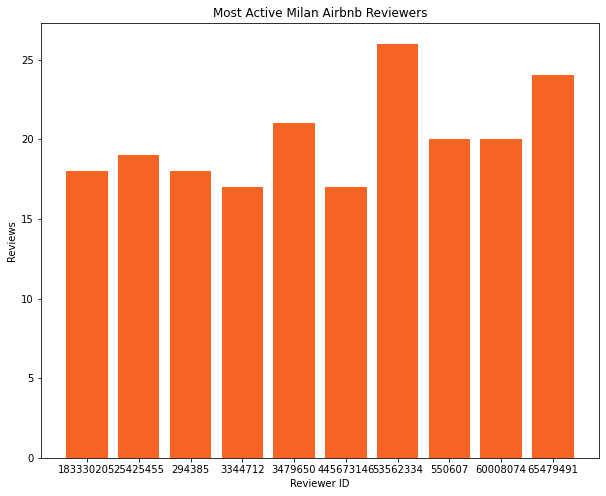

In [96]:
#additional code for graphing with matplot lib incase ploty does not work

#making user_id a string for graphing
top_10_reviewers['reviewer_id'] = top_10_reviewers['reviewer_id'].astype(str)
#making sorted df for chart
top_10_sorted = top_10_reviewers.sort_values('review_count')
#making airbnb_rating a string
grouped = top_10_sorted.groupby("reviewer_id")["review_count"].sum()
fig = plt.figure(figsize = (10, 8))
# create a bar plot
plt.bar(grouped.index, grouped.values, color="#f86424")
# set the x-axis label
plt.xlabel("Reviewer ID")
# set the y-axis label
plt.ylabel("Reviews")
#adding title
plt.title("Most Active Milan Airbnb Reviewers")
# show the plot
plt.show()

In [97]:
#making dataframe of review counts to compare distribution of reviews
top_ratings = pd.DataFrame(english_reviews["rec_scale"].value_counts(ascending=False).head(15))
top_ratings = top_ratings.reset_index()
top_ratings = top_ratings.rename(columns={"rec_scale":"Rec_Count"})
top_ratings = top_ratings.rename(columns={"index":"Rec_Number"})

#making user_id a string for plotting
top_ratings['Rec_Count'] = top_ratings['Rec_Count'].astype(str)
top_ratings

,Rec_Number,Rec_Count
0,4,10589
1,3,10101
2,5,7453
3,2,4967
4,6,4628
5,7,2652
6,1,2119
7,8,1689
8,9,644
9,10,193


In [98]:
# additional code for graphing with matplot lib incase ploty does not work

#making bar graph of rating frequency
#grouped = top_ratings.groupby("Rec_Number")["Rec_Count"].sum()
#fig = plt.figure(figsize = (10, 8))
# create a bar plot
#plt.bar(grouped.index, grouped.values, color="#f86424")
# set the x-axis label
#plt.xlabel("Rec Number")
# set the y-axis label
#plt.ylabel("Rating Count")
#adding title
#plt.title("Rating Frequency")
# show the plot
#plt.show()

#need to fix this

In [99]:
#using plotly to plot the top reviewers
#fig = px.bar(top_10_sorted, x="reviewer_id", y="review_count")
#fig.update_layout(title_text='Top Reviewers',
               #   title_x=0.5,
               #   xaxis_title="Reviewer ID",
               #   yaxis_title="Review Count",
               #  plot_bgcolor='white')
#fig.update_traces(marker_color = "#f86424")
#fig.show()

In [100]:
#top_ratings.sort_values(by="rating")

## Add in Necessary Functions

In [101]:
class ModelWithCV():
    '''Structure to save the model and more easily see its crossvalidation'''
    
    def __init__(self, model, model_name, X, y, cv_now=True):
        self.model = model
        self.name = model_name
        self.X = X
        self.y = y
        # For CV results
        self.cv_results = None
        self.cv_mean = None
        self.cv_median = None
        self.cv_std = None
        #
        if cv_now:
            self.cross_validate()
        
    def cross_validate(self, X=None, y=None, kfolds=5):
        '''
        Perform cross-validation and return results.
        
        Args: 
          X:
            Optional; Training data to perform CV on. Otherwise use X from object
          y:
            Optional; Training data to perform CV on. Otherwise use y from object
          kfolds:
            Optional; Number of folds for CV (default is 10)  
        '''
        
        cv_X = X if X else self.X
        cv_y = y if y else self.y

        self.cv_results = cross_val_score(self.model, cv_X, cv_y, cv=kfolds, scoring = 'f1')
        self.cv_mean = np.mean(self.cv_results)
        self.cv_median = np.median(self.cv_results)
        self.cv_std = np.std(self.cv_results)

        
    def print_cv_summary(self):
        cv_summary = (
        f'''CV Results for `{self.name}` model:
            {self.cv_mean:.5f} ± {self.cv_std:.5f} f1 score
        ''')
        print(cv_summary)

        
    def plot_cv(self, ax):
        '''
        Plot the cross-validation values using the array of results and given 
        Axis for plotting.
        '''
        ax.set_title(f'CV Results for `{self.name}` Model')
        # Thinner violinplot with higher bw
        sns.violinplot(y=self.cv_results, ax=ax, bw=.4)
        sns.swarmplot(
                y=self.cv_results,
                color='orange',
                size=10,
                alpha= 0.8,
                ax=ax
        )

        return ax

## Recommendation System
Export smaller Dataframe english reviews for ease of loading back in. Use a different notebook from this point. 

In [102]:
#english_reviews.to_csv(r'C:\Users\anatjacobson\Documents\Flatiron\Projects\Capstone\english_reviews.csv', index=False, header=True)

#print(english_reviews)

Commmented out as to not keep exporting.


#### Surprise Data

To make this model, we will be using the scikit tool suprise that uses a range of algorithms made up of matrix factorization-based methods for collaborative filtering. To begin, we are making a new dataframe with just Reviewer ID, rec_scale, and listing ID from our final english reviews dataframe.

In [103]:
from surprise.model_selection import cross_validate
from surprise import Dataset, Reader, accuracy
from surprise.prediction_algorithms import KNNWithMeans, KNNBasic, KNNBaseline,  SVD, SVDpp, NMF, BaselineOnly, NormalPredictor
from surprise.model_selection import GridSearchCV, cross_validate, train_test_split

In [104]:
#dropping columns that aren't needed for Surprise (since )
surprise_df = english_reviews.drop(columns=["id", "date", "reviewer_name", "comments", "language",
                                    "polarity"])

In [105]:
surprise_df.head()

,listing_id,reviewer_id,rec_scale
1,6400,415910,5
2,6400,415910,4
5,6400,415910,2
6,6400,5023643,1
7,6400,415910,4


In [106]:
#change the order to reviewer, listing id, rec_scale
surprise_df = surprise_df[['reviewer_id', 'listing_id', 'rec_scale']]
surprise_df

,reviewer_id,listing_id,rec_scale
1,415910,6400,5
2,415910,6400,4
5,415910,6400,2
6,5023643,6400,1
7,415910,6400,4
...,...,...,...
611693,157651921,832647024131935906,4
611768,491920050,841111184096419460,3
611782,223990220,843618815888733815,7
611785,35287167,846130517363365733,3


In [107]:
surprise_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45035 entries, 1 to 611800
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   reviewer_id  45035 non-null  int64   
 1   listing_id   45035 non-null  int64   
 2   rec_scale    45035 non-null  category
dtypes: category(1), int64(2)
memory usage: 2.3 MB


In [108]:
surprise_df.isnull().sum()

reviewer_id    0
listing_id     0
rec_scale      0
dtype: int64

In [109]:
#locating the nulls
#surprise_df.loc[surprise_df['rec_scale'].isnull()]

In [110]:
surprise_df.dropna(inplace = True)

In [111]:
from surprise import Reader, Dataset

reader = Reader(rating_scale=(1, 10))

#loading final dataset
data = Dataset.load_from_df(surprise_df, reader)

#spltting into train and test
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

In [112]:
#looking at number of users
print('Number of users: ', trainset.n_users, '\n')
print('Number of items: ', trainset.n_items)

Number of users:  18054 

Number of items:  8647


#### Baseline Model


In [113]:
#this is my true baseline
# Instantiate the model
baseline = NormalPredictor()

#fitting model
baseline.fit(trainset)

# making prediction on testset
predictions = baseline.test(testset)

# Save RMSE score
baseline_normal = accuracy.rmse(predictions)

RMSE: 2.5120


In [114]:
baseline_normal

2.511957739069242

Normal Predictor baseline model's RMSE (Root Mean Squared Error) is telling us theat or predicted rating of airbnb recommendors is 2.5 points away from the actual rating. 

#### BaselineOnly
Below running a baseline only to see if can decrease the RMSE

In [115]:
# Instantiate and fit model
baseline_only = BaselineOnly()

#fitting model
baseline_only.fit(trainset)

# making prediction on testset
predictions = baseline_only.test(testset)

# Save RMSE score
baseline_only_rmse = accuracy.rmse(predictions)

Estimating biases using als...
RMSE: 1.7693


We decreased the RMSE somewhat substatially with this baseline only method. Below we will be running a few more complex models to see if we can decrease further. 

### SVD
SVD (Singular Value Decomposition) is used to reduce the dimensionality of our matrix. SVD is a matrix factorization model that decomposes the reviewer reviews and airbnb listings into three matrices. This helps us understand the relationship between users and items.

#### SVD Model 1
In this first model we will be using normal metrics as a base and see how the model runs! 

In [116]:
# Cross validate a basic SVD with no hyperparameter

svd_1 = SVD(random_state=42)

results = cross_validate(svd_1, data, measures=['RMSE'], cv=3, n_jobs = -3, verbose=True)

Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.7654  1.7669  1.7574  1.7632  0.0042  
Fit time          2.03    2.01    1.99    2.01    0.02    
Test time         0.13    0.13    0.14    0.13    0.00    


In [117]:
#cv_svd1= ModelWithCV(svd_1, 'svd_1', X_train, y_train)
#cv_decision.print_cv_summary()

In [118]:
# Fit to trainset and predict on the testset for evaluation
svd_1.fit(trainset)

predictions1 = svd_1.test(testset)

svd_1_rmse = accuracy.rmse(predictions1)
#do I want to be evaluatiing on the test set already? 

RMSE: 1.7565


The RMSE for the model did decrease, however not by very much. Will keep iterating on models to attempt more accurate predictions.

### Grid Search
- Performing a grid search below to find best hyper parameters for model with lowest RMSE

#defaults
    n_factors=100,
    n_epochs=20,
    biased=True,
    init_mean=0,
    init_std_dev=0.1,
    lr_all=0.005,
    reg_all=0.02,
    lr_bu=None,
    lr_bi=None,
    lr_pu=None,
    lr_qi=None,
    reg_bu=None,
    reg_bi=None,
    reg_pu=None,
    reg_qi=None,
    random_state=None,
    verbose=False,

In [120]:
#test grid search
params1 = {'n_factors': [10, 50, 100, 150, 200],
          'n_epochs': [10, 20],
          'init_mean': [-0.5, 0, 0.5], 
          'reg_all': [.05, 0.02],
         'biased': [True, False]}

g_s_svd1 = GridSearchCV(SVD, param_grid=params1, cv=5, joblib_verbose= 3, n_jobs= -3, refit=True)

g_s_svd1.fit(data)
g_s_svd1.best_params['rmse']


[Parallel(n_jobs=-3)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-3)]: Done  20 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-3)]: Done 116 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-3)]: Done 276 tasks      | elapsed:   52.2s
[Parallel(n_jobs=-3)]: Done 500 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-3)]: Done 600 out of 600 | elapsed:  3.9min finished


{'n_factors': 50,
 'n_epochs': 20,
 'init_mean': 0,
 'reg_all': 0.05,
 'biased': True}

In [121]:
print(g_s_svd1.best_score['rmse'])
print(g_s_svd1.best_params['rmse'])

1.752486923342771
{'n_factors': 50, 'n_epochs': 20, 'init_mean': 0, 'reg_all': 0.05, 'biased': True}


In [122]:
# instantiating SVD with best hyperparameters from gridsearch
g_s_svd1 = SVD(n_factors=50,n_epochs=20, init_mean=0, reg_all=0.05, biased=True)

# fit on trainset and make predictions using testset
g_s_svd1.fit(trainset)
predictions1 = g_s_svd1.test(testset)
g_s_svd_1 = accuracy.rmse(predictions1)

RMSE: 1.7546


In [123]:
#saving test rmse for final graph
test_g_s_svd_1_params = {'n_factors': 50,'n_epochs': 20,'init_mean': 0,'reg_all': 0.05, 'biased': True}
test_g_s_svd_1_rmse = 1.7546

In [124]:
from joblib import dump, load

In [115]:
#dump(g_s_svd,"./data/model.pkl")

['./data/model.pkl']

This maxed out all our parameters so going to change for following grid search. 

### Grid Search 2

In [125]:
params2 = {'n_factors': [1, 3, 5],
          'n_epochs': [15, 20, 25, 30],
           'init_mean': [0, 0.5, 0.8], 
           'reg_all': [.05, 0.02, .01, .03],
           'biased': [True, False]}

g_s_svd2 = GridSearchCV(SVD, param_grid=params2, cv=5, refit=True, joblib_verbose= 3, n_jobs = -3)

g_s_svd2.fit(data)
g_s_svd2.best_params['rmse']

[Parallel(n_jobs=-3)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-3)]: Done  20 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-3)]: Done 116 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-3)]: Done 276 tasks      | elapsed:   22.3s
[Parallel(n_jobs=-3)]: Done 500 tasks      | elapsed:   49.0s
[Parallel(n_jobs=-3)]: Done 788 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-3)]: Done 1140 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-3)]: Done 1440 out of 1440 | elapsed:  2.7min finished


{'n_factors': 5,
 'n_epochs': 30,
 'init_mean': 0,
 'reg_all': 0.05,
 'biased': True}

In [128]:
print(g_s_svd2.best_score['rmse'])
print(g_s_svd2.best_params['rmse'])

1.7426244506396997
{'n_factors': 5, 'n_epochs': 30, 'init_mean': 0, 'reg_all': 0.05, 'biased': True}


In [129]:
# instantiating SVD with best hyperparameters from gridsearch
g_s_svd2 = SVD(n_factors=5,n_epochs=30, init_mean=0,  reg_all=0.05, biased=True)

# fit on trainset and make predictions using testset
g_s_svd2.fit(trainset)
predictions2 = g_s_svd2.test(testset)
g_s_svd_2 = accuracy.rmse(predictions2)

RMSE: 1.7415


In [130]:
#saving test rmse for final graph
test_g_s_svd_2_params = {'n_factors':5,'n_epochs': 30,'init_mean': 0,'reg_all': 0.05, 'biased': True}
test_g_s_svd_2_rmse = 1.7415

### Grid Search 3

#defaults
    n_factors=100,
    n_epochs=20,
    biased=True,
    init_mean=0,
    init_std_dev=0.1,
    lr_all=0.005,
    reg_all=0.02,
    lr_bu=None,
    lr_bi=None,
    lr_pu=None,
    lr_qi=None,
    reg_bu=None,
    reg_bi=None,
    reg_pu=None,
    reg_qi=None,
    random_state=None,
    verbose=False,

In [131]:
#making sure to include defaults
params3 = {'n_factors': [4, 5, 8, 10, 100],
          'n_epochs': [20, 30, 40, 50, 60],
          'reg_all': [.05, .02, .01, .03],
         'biased': [True, False]}

g_s_svd3 = GridSearchCV(SVD, param_grid=params3, cv=5, refit=True, joblib_verbose= 3, n_jobs = -3)

g_s_svd3.fit(data)
g_s_svd3.best_params['rmse']

[Parallel(n_jobs=-3)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-3)]: Done  20 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-3)]: Done 116 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-3)]: Done 276 tasks      | elapsed:   44.4s
[Parallel(n_jobs=-3)]: Done 500 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-3)]: Done 788 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-3)]: Done 1000 out of 1000 | elapsed:  6.0min finished


{'n_factors': 10, 'n_epochs': 40, 'reg_all': 0.05, 'biased': True}

In [132]:
print(g_s_svd3.best_score['rmse'])
print(g_s_svd3.best_params['rmse'])

1.7462540923342451
{'n_factors': 10, 'n_epochs': 40, 'reg_all': 0.05, 'biased': True}


In [134]:
# instantiating SVD with best hyperparameters from gridsearch
g_s_svd3 = SVD(n_factors=10,n_epochs=40,  reg_all=0.05, biased=True)

# fit on trainset and make predictions using testset
g_s_svd3.fit(trainset)
predictions3 = g_s_svd3.test(testset)
g_s_svd_3 = accuracy.rmse(predictions3)

RMSE: 1.7401


In [135]:
#saving test rmse for final graph
test_g_s_svd_3_params = {'n_factors':10,'n_epochs': 40,'reg_all': 0.05, 'biased': True}
test_g_s_svd_3_rmse = 1.7401

## Running NMF Model

Defaults
    n_factors=15,
    n_epochs=50,
    biased=False,
    reg_pu=0.06,
    reg_qi=0.06,
    reg_bu=0.02,
    reg_bi=0.02,
    lr_bu=0.005,
    lr_bi=0.005,
    init_low=0,
    init_high=1,
    random_state=None,
    verbose=False,

In [125]:
# New hyperparameter dictionary for nmf model
nmf_param_grid = {'biased':[True, False],
                  'n_factors':[5, 10, 15, 20, 30, 40],
                  'n_epochs': [20, 25, 40, 50, 60, 70]}
nmf_gs_model1 = GridSearchCV(NMF, param_grid=nmf_param_grid, cv=3, joblib_verbose=3, n_jobs= -3, return_train_measures=True)

# Fit and return the best hyperparameters
nmf_gs_model1.fit(data)
nmf_gs_model1.best_params['rmse']

[Parallel(n_jobs=-3)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-3)]: Done  20 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-3)]: Done 116 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-3)]: Done 216 out of 216 | elapsed:  3.2min finished


{'biased': True, 'n_factors': 10, 'n_epochs': 20}

In [127]:
nmf_gs_model1.best_score['rmse']

1.8173780410125762

In [128]:
#saving params and best rmse
nmf_gs_model_rmse1 = 1.8173780410125762
nmf_gs_model_best_params1 = {'biased': True, 'n_factors': 10, 'n_epochs': 20}

In [129]:
# instantiating NFM
nfm_model1 = NMF(biased=True, n_factors=10, n_epochs=20)

# Fit on trainset and make predictions using testset to return RMSE metric
nfm_model1.fit(trainset)
predictions1 = nfm_model1.test(testset)
nfm_model_1 = accuracy.rmse(predictions1)

RMSE: 1.8098


In [130]:
#saving test nfm model rmse for final graph
test_nfm_model_1_params = {'biased': True, 'n_factors': 10, 'n_epochs': 20}
test_nfm_model_1_rmse = 1.8098

### Running one more nmf to see improvement

In [131]:
# New hyperparameter dictionary for nmf model
nmf_param_grid = {'biased':[True, False],
                  'n_factors':[5, 8, 10, 12, 15],
                  'n_epochs': [5, 10, 15, 20, 25]}
nmf_gs_model2 = GridSearchCV(NMF, param_grid=nmf_param_grid, cv=3, joblib_verbose=3, n_jobs= -3, return_train_measures=True)

# Fit and return the best hyperparameters
nmf_gs_model2.fit(data)
nmf_gs_model2.best_params['rmse']

[Parallel(n_jobs=-3)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-3)]: Done  20 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-3)]: Done 116 tasks      | elapsed:   23.7s
[Parallel(n_jobs=-3)]: Done 150 out of 150 | elapsed:   31.8s finished


{'biased': True, 'n_factors': 10, 'n_epochs': 5}

In [132]:
nmf_gs_model2.best_score['rmse']

1.8093283165553586

In [135]:
#saving params and best rmse
nmf_gs_model_rmse2 = 1.8093283165553586
nmf_gs_model_best_params2 = {'biased': True, 'n_factors': 10, 'n_epochs': 5}

In [136]:
# instantiating NFM
nfm_model2 = NMF(biased=True, n_factors=10, n_epochs=5)

# Fit on trainset and make predictions using testset to return RMSE metric
nfm_model2.fit(trainset)
predictions2 = nfm_model1.test(testset)
nfm_model_2 = accuracy.rmse(predictions2)

RMSE: 1.8098


Attempting one other model now to see if SVP++ might work better. Otherwise will use SVD as our best model. 

## Running a SVD++ Model

SVDpp()
SVDpp(
    n_factors=20,
    n_epochs=20,
    init_mean=0,
    init_std_dev=0.1,
    lr_all=0.007,
    reg_all=0.02,
    lr_bu=None,
    lr_bi=None,
    lr_pu=None,
    lr_qi=None,
    lr_yj=None,
    reg_bu=None,
    reg_bi=None,
    reg_pu=None,
    reg_qi=None,
    reg_yj=None,
    random_state=None,
    verbose=False,
)

In [137]:
#Running without tuning first
svdpp_1 = SVDpp()

results_svdpp = cross_validate(svdpp_1, data, measures=['RMSE'], cv=3, n_jobs = -3, verbose=True)

Evaluating RMSE of algorithm SVDpp on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.7562  1.7658  1.7504  1.7574  0.0063  
Fit time          2.16    2.17    2.18    2.17    0.01    
Test time         0.12    0.12    0.12    0.12    0.00    


In [138]:
svdpp_1.fit(trainset)

predictions = svdpp_1.test(testset)

svdpp_1_rmse = accuracy.rmse(predictions1)

RMSE: 1.8098


Testing out grid search below

In [140]:
#using the best parameters from SVD
params = {'n_factors': [4, 5, 8, 10, 20, 25],
          'n_epochs': [10, 20, 30, 40, 50, 60],
          'reg_all': [.05, .02, .01, .03]}

g_s_svdpp1 = GridSearchCV(SVDpp, param_grid=params, cv=5, refit=True, joblib_verbose= 3, n_jobs = -3)

g_s_svdpp1.fit(data)
g_s_svdpp1.best_params['rmse']

[Parallel(n_jobs=-3)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-3)]: Done  20 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-3)]: Done 116 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-3)]: Done 276 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-3)]: Done 500 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-3)]: Done 720 out of 720 | elapsed: 13.2min finished


{'n_factors': 10, 'n_epochs': 30, 'reg_all': 0.05}

In [141]:
print(g_s_svdpp1.best_score['rmse'])
print(g_s_svdpp1.best_params['rmse'])

1.748749736821933
{'n_factors': 10, 'n_epochs': 30, 'reg_all': 0.05}


In [142]:
# instantiating SVD with best hyperparameters from gridsearch
g_s_svdpp1 = SVDpp(n_factors=10,n_epochs=30,  reg_all=0.05)

# fit on trainset and make predictions using testset
g_s_svdpp1.fit(trainset)
predictions = g_s_svdpp1.test(testset)
g_s_svdpp1 = accuracy.rmse(predictions)

RMSE: 1.7476


SVD regular provided the best model, so we will be stopping our iterations and continuing with the recommendation model from here. Will continue iterating if there is time at a later point but the for the purposes of this project we will be using svd ___ as our best model. 

## Best Model and Recommendations

We used SVD to create our final model. This is a collaborative filtering method that identifies relationship between users airbnb ratings to make personzlied recommendations for users, based on their previous comments on other airbnbs.

Our best model was the final SVD Grid Search that gave us a RMSE of 1.74.

- n_factors = 10
- reg_all = .05
- n_epochs = 40

In [161]:
best_model = SVD(n_factors=10,n_epochs=40,  reg_all=0.05)

In [162]:
best_model.fit(trainset)
predictions = best_model.test(testset)
accuracy_best_model = accuracy.rmse(predictions)

RMSE: 1.7485


In [145]:
best_model_params = {'n_factors':10,'n_epochs': 40,'reg_all': 0.05}
best_model_rmse = 1.7401

Function for spitting out our predictions

In [149]:
#saving new dataframe with only user information
reviewer_df = surprise_df.reset_index()
reviewer_df.set_index('reviewer_id', inplace = True)
reviewer_df.drop(columns = 'rec_scale', inplace =True)
reviewer_df.head()

,index,listing_id
reviewer_id,,
415910,1,6400
415910,2,6400
415910,5,6400
5023643,6,6400
415910,7,6400


Defining function below

In [300]:
def rec_airbnbs():
    
    user = int(input('reviewer_id: '))
    n_recs = int(input('How many airbnb recommendations do you want? '))
    
    have_reviewed = list(reviewer_df.loc[user, 'listing_id'])
    not_reviewed = english_reviews.copy() #put in listings df
    not_reviewed = not_reviewed.drop_duplicates(subset=['listing_id'])
    not_reviewed.set_index('listing_id', inplace = True)
    not_reviewed.drop(have_reviewed, inplace=True)
    
    not_reviewed.reset_index(inplace = True)

    not_reviewed['est_rating'] = not_reviewed['listing_id'].apply(lambda x: best_model.predict(user, x).est)
    not_reviewed.sort_values(by = 'est_rating', ascending = False, inplace = True)
    #not_reviewed = not_reviewed.rename(columns=
    not_reviewed = not_reviewed.drop(columns=['id'])
    return not_reviewed.head(n_recs)

In [301]:
rec_airbnbs()

reviewer_id: 47867325
How many airbnb recommendations do you want? 3


,listing_id,date,reviewer_id,reviewer_name,comments,language,polarity,rec_scale,est_rating
7397,552172641011665683,2022-03-07,36158582,Leïla,"Great apartment, the location is optimal; the ...",en,0.493,5,5.955709
864,4828862,2015-08-20,20149003,Renato,Very Good,en,0.762,8,5.924407
2466,16747035,2018-11-29,26617627,Dan,Recommended for easy access to fashion distric...,en,0.603,7,5.882261


In [159]:
#english_reviews

157651921

In [352]:
english_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,language,polarity,rec_scale
1,6400,227727,2011-04-16,415910,Tej,Staying at Francesca's and Alberto's place was...,en,0.413,5
2,6400,1162608,2012-04-22,415910,Tej,This is my second time staying with Francesca ...,en,0.392,4
5,6400,30074708,2015-04-17,415910,Tej,Always a pleasure staying with Francesca and f...,en,0.112,2
6,6400,47340535,2015-09-18,5023643,Glynn,The host canceled this reservation the day bef...,en,0.000,1
7,6400,70088360,2016-04-16,415910,Tej,Another nice stay at Francesca's place.. I fee...,en,0.359,4


In [371]:
def user_reviewed():
    
    user = int(input('reviewer_id: '))
    
    reviews = english_reviews.loc[english_reviews['reviewer_id'] == user].sort_values(by = 'rec_scale', ascending = False)
    
    return reviews.merge(listings, on = 'listing_id', how = 'left')


In [367]:
rec_airbnbs()

reviewer_id: 415910
How many airbnb recommendations do you want? 3


,listing_id,date,reviewer_id,reviewer_name,comments,language,polarity,rec_scale,est_rating
7398,552172641011665683,2022-03-07,36158582,Leïla,"Great apartment, the location is optimal; the ...",en,0.493,5,6.002798
864,4828862,2015-08-20,20149003,Renato,Very Good,en,0.762,8,5.979728
2467,16747035,2018-11-29,26617627,Dan,Recommended for easy access to fashion distric...,en,0.603,7,5.928365


In [370]:
listings['host_is_superhost'].value_counts()

f    16226
t     4144
Name: host_is_superhost, dtype: int64

In [372]:
#415910
user_reviewed()

reviewer_id: 20149003


KeyError: 'listing_id'

In [171]:
#highest rated movies User ID 157651921
user157651921 = english_reviews.loc[english_reviews['reviewer_id'] == 157651921].sort_values(by = 'rec_scale', ascending = False).head(3)
user157651921

,listing_id,id,date,reviewer_id,reviewer_name,comments,language,polarity,rec_scale
568358,593104498337273085,761437627169758256,2022-11-16,157651921,Habib,Very friendly host. Place is clean and has all...,en,0.307,4
611693,832647024131935906,844102915345361781,2023-03-10,157651921,Habib,good location. perfect if you need a practical...,en,0.337,4


In [250]:
listing_overview = listings.loc[(listings['id'] == 593104498337273085) |
                                (listings['id'] == 6400) ] 


In [251]:
def listings_info():
    
    listing_id = int(input('input listing id: '))
    listing_id2 = int(input('input listing id2: ')) 
    listing_overview = listings.loc[(listings['id'] == listing_id) |
                                (listings['id'] == listing_id2) ] 
    return listing_overview

In [303]:
#593104498337273085
#6400
listings_info()

input listing id: 593104498337273085
input listing id2: 6400


,id,name,description,neighborhood_overview,host_is_superhost,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,...,beds,amenities,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
1848,593104498337273085,NEW HOUSE w/ GARDEN AREA ⋆ Sibari Green Apartment,"Brand New, Charming and Quiet apartment with G...",NaN,t,t,RIPAMONTI,Entire rental unit,Entire home/apt,3,...,2.0,"[""Hair dryer"", ""Smoke alarm"", ""Freezer"", ""Free...",4.96,4.96,4.98,5.0,5.0,4.75,4.89,f
18431,6400,The Studio Milan,"Enjoy your stay at The Studio, a light-filled ...",The neighborhood is quiet and very well connec...,f,f,TIBALDI,Private room in rental unit,Private room,1,...,1.0,"[""TV"", ""First aid kit"", ""Wifi"", ""Washer"", ""Iro...",4.89,5.00,5.00,5.0,5.0,4.56,4.67,f


In [365]:
listings = pd.read_csv('listings.csv')
listings.drop(columns = ['listing_url', 'scrape_id', 'last_scraped', 'source', 'picture_url',
                        'host_id',  'license', 'calculated_host_listings_count_shared_rooms',
                        'calculated_host_listings_count_entire_homes', 'reviews_per_month',
                        'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count',
                        'first_review', 'last_review', 'host_since', 'host_url', 'minimum_nights',
                        'minimum_minimum_nights', 'maximum_maximum_nights', 'minimum_maximum_nights',
                         'maximum_nights_avg_ntm', 'minimum_nights_avg_ntm', 'longitude', 'latitude',
                        'bathrooms', 'calendar_updated', 'availability_30', 'availability_60',
                        'availability_90', 'availability_365', 'neighbourhood_group_cleansed',
                        'neighbourhood', 'has_availability', 'bathrooms_text', 'host_about',
                        'host_thumbnail_url', 'host_picture_url', 'maximum_minimum_nights',
                        'maximum_nights', 'price', 'host_has_profile_pic', 'host_listings_count',
                        'host_neighbourhood', 'host_verifications', 'host_total_listings_count',
                        'number_of_reviews_l30d', 'number_of_reviews_ltm', 'calendar_last_scraped',
                        'number_of_reviews', 'host_location', 'host_name', 'host_acceptance_rate',
                        'host_response_time','host_response_rate', 'review_scores_rating',
                        'review_scores_accuracy', 'review_scores_checkin', 'review_scores_cleanliness',
                        'review_scores_location', 'review_scores_communication', 'review_scores_value', 'description' ], 
              
              inplace = True)

In [364]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20370 entries, 0 to 20369
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      20370 non-null  int64  
 1   name                    20363 non-null  object 
 2   description             19991 non-null  object 
 3   neighborhood_overview   11182 non-null  object 
 4   host_is_superhost       20370 non-null  object 
 5   host_identity_verified  20370 non-null  object 
 6   neighbourhood_cleansed  20370 non-null  object 
 7   property_type           20370 non-null  object 
 8   room_type               20370 non-null  object 
 9   accommodates            20370 non-null  int64  
 10  bedrooms                18924 non-null  float64
 11  beds                    20091 non-null  float64
 12  amenities               20370 non-null  object 
 13  instant_bookable        20370 non-null  object 
dtypes: float64(2), int64(2), object(10)
me

In [306]:
english_reviews['listing_id'].unique().shape
#look for the intersection between 2 sets. 

(9272,)

In [308]:
(set(english_reviews['listing_id']) in set(listings['id']))

False

In [313]:
english_reviews['listing_id'].isin(set(listings['id'])).unique()

array([ True])

In [314]:
english_reviews['listing_id'].isin(listings['id']).unique()

array([ True])

In [349]:
def rec_airbnbs_info():
    
    user = int(input('reviewer_id: '))
    n_recs = int(input('How many airbnb recommendations do you want? '))
    
    have_reviewed = list(reviewer_df.loc[user, 'listing_id'])
    not_reviewed = english_reviews.copy()
    not_reviewed = not_reviewed.drop_duplicates(subset=['listing_id'])
    not_reviewed.set_index('listing_id', inplace = True)
    not_reviewed.drop(have_reviewed, inplace=True)
    
    not_reviewed.reset_index(inplace = True)

    not_reviewed['est_rating'] = not_reviewed['listing_id'].apply(lambda x: best_model.predict(user, x).est)
    not_reviewed.sort_values(by = 'est_rating', ascending = False, inplace = True)
    
    not_reviewed = not_reviewed.drop(columns=['id'])
    not_reviewed.merge(listings, on = 'listing_id', how = 'left')
    
    return not_reviewed.merge(listings, on = 'listing_id', how = 'left').head(n_recs)

In [350]:
#157651921 user
rec_airbnbs_info()

reviewer_id: 157651921
How many airbnb recommendations do you want? 3


,listing_id,date,reviewer_id,reviewer_name,comments,language,polarity,rec_scale,est_rating,name,...,beds,amenities,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,552172641011665683,2022-03-07,36158582,Leïla,"Great apartment, the location is optimal; the ...",en,0.493,5,5.922519,CORSO GARIBALDI 64 - LIVING MILAN,...,1.0,"[""Hair dryer"", ""Freezer"", ""Coffee maker: Nespr...",4.77,4.77,4.73,4.93,4.88,4.97,4.63,t
1,4828862,2015-08-20,20149003,Renato,Very Good,en,0.762,8,5.904171,Pontida 4 Apartment,...,2.0,"[""TV"", ""Wifi"", ""Hot water"", ""Hair dryer"", ""Fir...",4.71,4.73,4.83,4.85,4.68,4.88,4.41,t
2,16747035,2018-11-29,26617627,Dan,Recommended for easy access to fashion distric...,en,0.603,7,5.855672,easyhomes-Spiga Suite,...,1.0,"[""Hair dryer"", ""Coffee maker: Nespresso"", ""Sin...",4.69,4.76,4.79,4.86,4.83,4.95,4.59,f


In [331]:
listings.rename(columns={"id": "listing_id"}, inplace=True)


In [341]:
not_reviewed.reset_index(inplace = True)

In [332]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20370 entries, 0 to 20369
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   listing_id                   20370 non-null  int64  
 1   name                         20363 non-null  object 
 2   description                  19991 non-null  object 
 3   neighborhood_overview        11182 non-null  object 
 4   host_is_superhost            20370 non-null  object 
 5   host_identity_verified       20370 non-null  object 
 6   neighbourhood_cleansed       20370 non-null  object 
 7   property_type                20370 non-null  object 
 8   room_type                    20370 non-null  object 
 9   accommodates                 20370 non-null  int64  
 10  bedrooms                     18924 non-null  float64
 11  beds                         20091 non-null  float64
 12  amenities                    20370 non-null  object 
 13  review_scores_ra

In [329]:
listings.head()

,id,name,description,neighborhood_overview,host_is_superhost,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,...,beds,amenities,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,5678774,Central Appartment,"A very nice flat in the city center, really go...",NaN,f,t,NAVIGLI,Entire condo,Entire home/apt,4,...,1.0,"[""Wifi"", ""Hot water"", ""Washer"", ""Iron"", ""TV wi...",4.50,4.50,5.00,4.50,4.50,4.50,4.00,f
1,5625937,Fancy apt in historical building in Duomo Area...,T,NaN,f,t,DUOMO,Entire rental unit,Entire home/apt,4,...,2.0,"[""TV"", ""Wifi"", ""Hot water"", ""Washer"", ""Iron"", ...",4.38,4.57,4.32,4.69,4.59,4.87,4.39,t
2,6139798,Affitto casa per Expo,Affittasi casa periodo estivo. Vicinissima a E...,"Il quartiere dispone di tutti i servizi, compr...",f,f,QUARTO OGGIARO,Entire rental unit,Entire home/apt,2,...,1.0,"[""TV with standard cable"", ""Washer"", ""Essentia...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,t
3,7479570,Central Air-Conditioned Apartment,Fully equipped house in the historical center ...,NaN,f,t,GUASTALLA,Entire loft,Entire home/apt,4,...,3.0,"[""Washer"", ""Essentials"", ""Elevator"", ""Kitchen""...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,f
4,8438872,Bedroom for the weekend,Very close to the Central Train Station and me...,NaN,f,t,GRECO,Private room in rental unit,Private room,2,...,1.0,"[""TV"", ""Washer"", ""Iron"", ""Hair dryer"", ""Essent...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,f


In [ ]:
not_reviewed.join(listings, lefton = )

In [320]:
listings.head()

list(reviewer_df.loc['listing_id', 'listing_id'])

,id,name,description,neighborhood_overview,host_is_superhost,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,...,beds,amenities,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,5678774,Central Appartment,"A very nice flat in the city center, really go...",NaN,f,t,NAVIGLI,Entire condo,Entire home/apt,4,...,1.0,"[""Wifi"", ""Hot water"", ""Washer"", ""Iron"", ""TV wi...",4.50,4.50,5.00,4.50,4.50,4.50,4.00,f
1,5625937,Fancy apt in historical building in Duomo Area...,T,NaN,f,t,DUOMO,Entire rental unit,Entire home/apt,4,...,2.0,"[""TV"", ""Wifi"", ""Hot water"", ""Washer"", ""Iron"", ...",4.38,4.57,4.32,4.69,4.59,4.87,4.39,t
2,6139798,Affitto casa per Expo,Affittasi casa periodo estivo. Vicinissima a E...,"Il quartiere dispone di tutti i servizi, compr...",f,f,QUARTO OGGIARO,Entire rental unit,Entire home/apt,2,...,1.0,"[""TV with standard cable"", ""Washer"", ""Essentia...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,t
3,7479570,Central Air-Conditioned Apartment,Fully equipped house in the historical center ...,NaN,f,t,GUASTALLA,Entire loft,Entire home/apt,4,...,3.0,"[""Washer"", ""Essentials"", ""Elevator"", ""Kitchen""...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,f
4,8438872,Bedroom for the weekend,Very close to the Central Train Station and me...,NaN,f,t,GRECO,Private room in rental unit,Private room,2,...,1.0,"[""TV"", ""Washer"", ""Iron"", ""Hair dryer"", ""Essent...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,f


In [318]:
#157651921 user
rec_airbnbs()

reviewer_id: 157651921
How many airbnb recommendations do you want? 3


,listing_id,date,reviewer_id,reviewer_name,comments,language,polarity,rec_scale,est_rating
7399,552172641011665683,2022-03-07,36158582,Leïla,"Great apartment, the location is optimal; the ...",en,0.493,5,5.922519
865,4828862,2015-08-20,20149003,Renato,Very Good,en,0.762,8,5.904171
2468,16747035,2018-11-29,26617627,Dan,Recommended for easy access to fashion distric...,en,0.603,7,5.855672
